<a href="https://colab.research.google.com/github/Ena11/Strojno_ucenje_python/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Izrada nekih od metoda strojnog učenja: chatbot, prepoznavanje slika i web scraping koristeći Python
# CHATBOT

import random

def pozdrav():
    print("Dobro došli u BioBerba chatbot. Kako vam mogu pomoći?")

def odgovor(unos_korisnika):
    pitanja_o_bolestima = ["Primjećujete li neobične simptome na biljkama? Molim Vas, opišite ih.",
                           "Imate li problema s bolestima biljaka? Recite mi više o simptomima koje primjećujete.",
                           "Primjećujete li da su biljke promijenile boju? Molim Vas opišite promijene",
                           "Hvala na dijeljenju informacija o bolestima biljaka. Da li primjećujete da se simptomi razlikuju između različitih vrsta biljaka?",
                           "Ako imate fotografije simptoma, to bi moglo pomoći u preciznijem dijagnosticiranju. Razmislite o podijeljenju s nama, ako je moguće."]
    pitanja_o_usjevima = ["Kako napreduje Vaš usjev trenutno?",
                          "Jeste li primijetili bilo kakve promjene u rastu biljaka?",
                          "Hvala na dijeljenju informacija o vašem usjevu. Da li primjećujete neke specifične izazove u rastu?",
                          "Uzgoj zdravih usjeva ključan je cilj. Kako pratite i održavate optimalne uvjete za rast?"]
    pitanja_o_okolini = ["Kakvo je tlo na vašem poljoprivrednom zemljištu?",
                     "Jeste li primijetili promjene u klimi koje bi mogle utjecati na vaše usjeve?"]
    pitanja_o_resursima = ["Kako upravljate vodom za navodnjavanje?",
                       "Koristite li određene vrste gnojiva ili pesticida?"]

    if "bolesti" in unos_korisnika:
        return random.choice(pitanja_o_bolestima)
    elif "usjevi" in unos_korisnika:
        return random.choice(pitanja_o_usjevima)
    elif "tlo" in unos_korisnika:
        return random.choice(pitanja_o_okolini)
    elif "navodnjavanje" in unos_korisnika:
        return random.choice(pitanja_o_resursima)
    else:
        return "Žao mi je, ne razumijem pitanje ili nemam informacije o toj temi. Postavite mi drugo pitanje."

def main():
    pozdrav()

    while True:
        pitanje = input("")

        if not pitanje:
            pozdrav()
            continue
        if pitanje == "hvala" or pitanje == "aj bok":
            print("Hvala na razgovoru. Ako imate dodatna pitanja, slobodno pitajte.")
            break
        else:
            chatbot_odgovor = odgovor(pitanje)
            print(chatbot_odgovor)

main()

1/1 [==============================] - 1s 1s/step
1: cucumber (31.43%)
2: cauliflower (11.41%)
3: bell_pepper (8.02%)
4: spaghetti_squash (4.36%)
5: acorn_squash (4.18%)


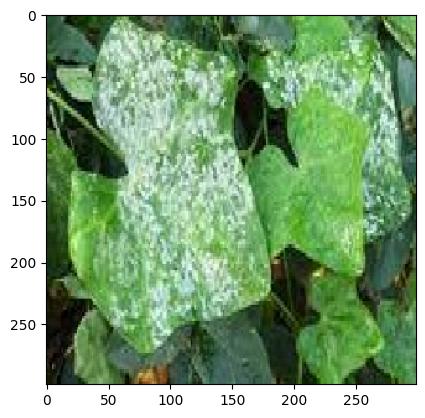

1/1 [==============================] - 0s 167ms/step
1: hip (45.53%)
2: cucumber (11.30%)
3: pot (8.80%)
4: yellow_lady's_slipper (6.89%)
5: spaghetti_squash (4.36%)


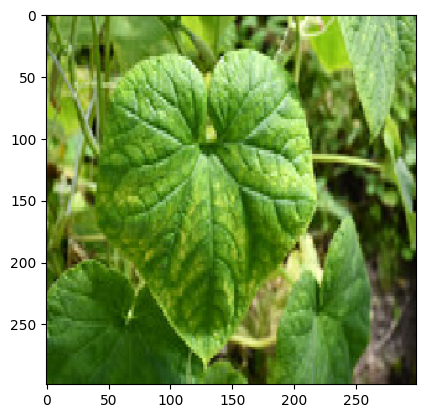

1/1 [==============================] - 0s 162ms/step
1: walking_stick (10.67%)
2: acorn (9.68%)
3: ant (5.12%)
4: lacewing (4.84%)
5: cricket (3.60%)


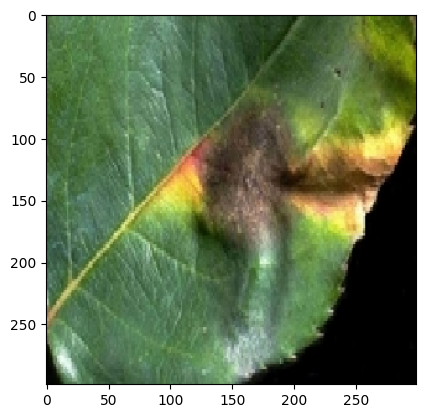

In [ ]:
# PREPOZNAVANJE SLIKA
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import numpy as np

model = InceptionV3(weights='imagenet')

def prepoznavanje_slika(path_slike):
  slika = image.load_img(path_slike, target_size=(299, 299))
  img_array = image.img_to_array(slika)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)
  prepoznavanje = model.predict(img_array)
  decoded_prepoznavanje = decode_predictions(prepoznavanje)

  for i, (imagenet_id, label, score) in enumerate(decoded_prepoznavanje[0]):
        print(f"{i + 1}: {label} ({score:.2%})")

  plt.imshow(slika)
  plt.show()

image_path = '/content/biljka bolest.jpeg'
image_path2 = '/content/depositphotos-olgasolo-1.jpg'
image_path3 = '/content/k2_items_src_9df43eaf2ccf22c628758e233881ef55.jpg'
prepoznavanje_slika(image_path)
prepoznavanje_slika(image_path2)
prepoznavanje_slika(image_path3)

In [ ]:
# WEB SCRAPING (PRETRAŽIVANJE WEBA)

import requests
from bs4 import BeautifulSoup
import csv
import time


def scrape_page(url, tag_name, class_name=None):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    if class_name:
        elements = soup.find_all(tag_name, class_=class_name)
    else:
        elements = soup.find_all(tag_name)

    result = []

    for element in elements:
        paragraphs = element.find_all()

        current_heading = "Uvod"
        current_text = []

        for paragraph in paragraphs:
            if paragraph.name == 'strong':
                continue

            if paragraph.name in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']:
                #Spremanje pronađenih paragrafa za naslov
                result.append([current_heading, '\n'.join(current_text)])

                #Postavljanje za novi naslov
                current_heading = paragraph.get_text()
                current_text = []
                continue


            if current_heading:
                #Dodavanje paragrafa trenutnom naslovu
                current_text.append(paragraph.get_text())

        #Spremanje zadnjeg naslova i njegovih paragrafa
        result.append([current_heading, '\n'.join(current_text)])
    return result


def main():
    # Lista URL-ova i povezanih tagova koje želimo posjetiti
    urls_and_tags = [
        ('https://www.agroklub.com/eko-proizvodnja/najznacajnije-bolesti-i-stetnici-biljaka/32940/', 'div',
         'content-style'),
        (
        'https://www.agroklub.com/eko-proizvodnja/puzevi-golaci-ozbiljna-su-prijetnja-poljoprivredi-koje-su-mogucnosti-bioloske-kontrole/91925/',
        'div', 'content-style'),
        ('https://www.agroklub.com/eko-proizvodnja/zakiseljavanje-tla-veliki-problem-u-proizvodnji/88739/', 'div',
         'content-style'),
        ('https://www.agroklub.com/eko-proizvodnja/kako-aktivni-ugljen-moze-pomoci-biljkama/88266/', 'div',
         'content-style'),
        ('https://www.agroklub.com/eko-proizvodnja/kloroza-sto-znaci-kada-listovi-promjene-boju/86099/', 'div',
         'content-style'),
        (
        'https://www.agroklub.com/eko-proizvodnja/kako-suzbiti-biljne-usi-evo-6-nacina/85811/', 'div', 'content-style'),
    ]

    all_content = []

    for url, tag_name, class_name in urls_and_tags:
        page_content = scrape_page(url, tag_name, class_name)
        all_content.extend(page_content)
        time.sleep(2)

    with open('content.csv', 'w', newline="", encoding='utf-8-sig') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Naslov', 'Opis'])
        csv_writer.writerows(all_content)

    print("CSV datoteka je kreirana.")


if __name__ == "__main__":
    main()









CSV datoteka je kreirana.
